# Predefined styles in Magics, ERA5 grib data example

Magics comes with number of ways to define shading when visualizing your data.  
If you want full control you can choose number of levels, the way levels are calculated, contours or no contours, shading or no shading, type of shading, showing grid values or not. Magics doesn't lack number of parameters you can set!

Many times, we don't have time to make a style that fits partucular data, we just want to inspect data for further use. For this purpose Magics has built in predefined styles for large number of meteorological and climatological variables.

## First import Magics, cdsapi and the other libraries

Aside of Magics, in this Notebook we will use couple of libraries to make work easier.
cdsapi to 
At ECMWF make sure that Magics and cdsapi are loaded.  
Documentation about **cdsapi** can be find [here](https://cds.climate.copernicus.eu/api-how-to.com "CDS API how to")

In [18]:
import Magics.macro as magics
import cdsapi
import datetime
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box, VBox
from cfgrib import xarray_store

`menus.py` contains the code got menus to choose parameter, type, date and time..  
We're just gonna run it here so our nice widgets work, but the code is not important for this excersize.

In [6]:
%run -i 'menus.py'

display(group)
display(VBox([box_auto]))



Dropdown(description='Group:', options={'Temperature and pressure': ['2m_dewpoint_temperature', '2m_temperatur…

Here we have code for CDS API request.  
It uses parameters we have chosen before, so we don't have to change the code and so we reduce the posibility of an error.  
At the moment this request only works for surface fields, and there is separate Notebook for pressure levels fields. In future it might be merged in one Notebook.

In [103]:
c = cdsapi.Client()

a = c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'variable':[
            parameters.value
        ],
            'grid': ['0.2', '0.2'],
            'product_type': Type.value,
            'year': dates.value.year,
            'month': dates.value.month,
            'day': dates.value.day,
            'time': times.value,
        'format':'grib'
    },
                "download.grib"
    )

2018-10-10 11:26:38,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2018-10-10 11:26:38,705 INFO Request is completed
2018-10-10 11:26:38,706 INFO Downloading http://136.156.132.110/cache-compute-0001/cache/data1/adaptor.mars.internal-1539158512.8064556-13067-10-7d719512-c9f1-4922-bcc5-1e77a1221cdf.grib to download.grib (3.1M)
2018-10-10 11:26:38,871 INFO Download rate 18.8M/s


### Load grib data and set area, coaslines and default tittle:
More about loading grib files in Magics can be found [here](https://confluence.ecmwf.int/display/MAGP/Grib+Input "GRIB input")

In [104]:
data =  magics.mgrib(grib_input_file_name  = 'download.grib')

In [35]:
areas = magics.predefined_areas()
Area = widgets.Dropdown(options=areas, value = 'europe', description='Predefined areas:', style=style)
display(Area)

Dropdown(description='Predefined areas:', index=15, options=('north_pole', 'eurasia', 'global', 'south_west_eu…

In [114]:
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name = Area.value
)

coast = magics.mcoast(map_grid =  "on",
                      map_grid_colour  =  "charcoal",
                      map_coastline  =  'on',
                      map_coastline_colour =  'navy',
                      map_boundaries = 'on',
                      map_boundaries_colour = 'navy',
                      map_coastline_resolution = 'high'
            )
title = magics.mtext()
legend = magics.mlegend(legend_display_type = "continuous")

### Load predefined ECMWF contour setting:
Setting the parameter **contour_automatic_setting** to **'ecmwf'** will give us style developed at ECMWF for this parameter.  

More about contour settings in Magics can be found [here](https://confluence.ecmwf.int/display/MAGP/Contouring "Contouring")  

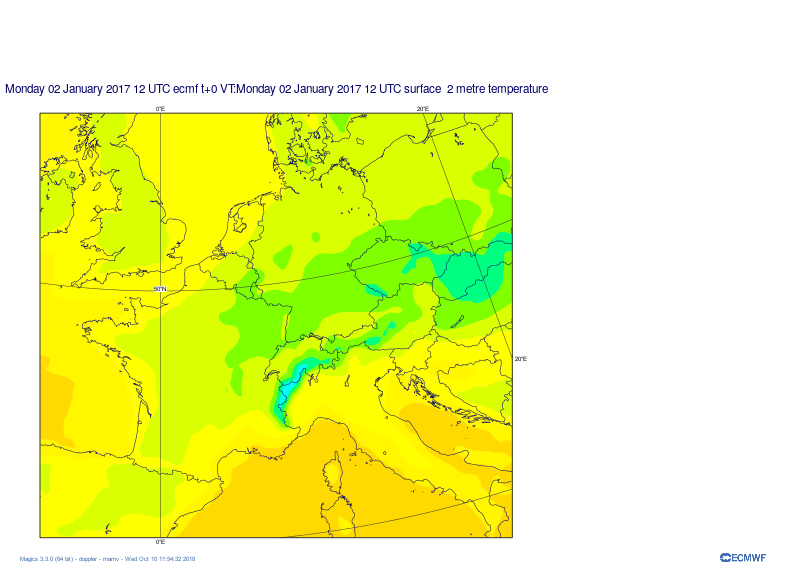

In [115]:
contour = magics.mcont(contour_automatic_setting = 'ecmwf')

magics.plot(projection, data, contour, legend, coast, title)

### How does Magics know which default style to apply?

Magics scans grib message and looks for specific combinations of grib keys. If more styles are found, Magics will choose the one with more keys matched. 

Grib keys that Magics is looking at are: shortName, paramId, type, levtype and levelist.

In [95]:
ds = xarray_store.open_dataset('download.grib')

ds.lcc.attrs
lcc_atrrs = ds.lcc.attrs
print('shortName =',lcc_atrrs['GRIB_shortName'])
print('paramId =',lcc_atrrs['GRIB_paramId'])
print('typeOfLevel =',lcc_atrrs['GRIB_typeOfLevel'])


shortName = lcc
paramId = 186
typeOfLevel = surface


Some ERA5 parameters (that have representation in ecCharts) have more than one built in predefined styles.  
Run the next cell and choose a style.

In [106]:
styles = magics.wmsstyles(data, )
all_styles = []
for i in styles['styles']:
    all_styles.append(i["name"])

One_style = widgets.Dropdown(options=all_styles, value = all_styles[0], description='Choose a style:', style=style)
display(One_style)


Dropdown(description='Choose a style:', options=('sh_all_fM48t56i4', 'sh_all_fM64t52i4', 'ct_red_i2_dash', 'sh…

To use this new feature we need to set the parameter **contour_automatic_setting** to **'style_name'**, and add a new parameter **contour_style_name** with the chosen style. In this example it takes value choosen by the previous menu.

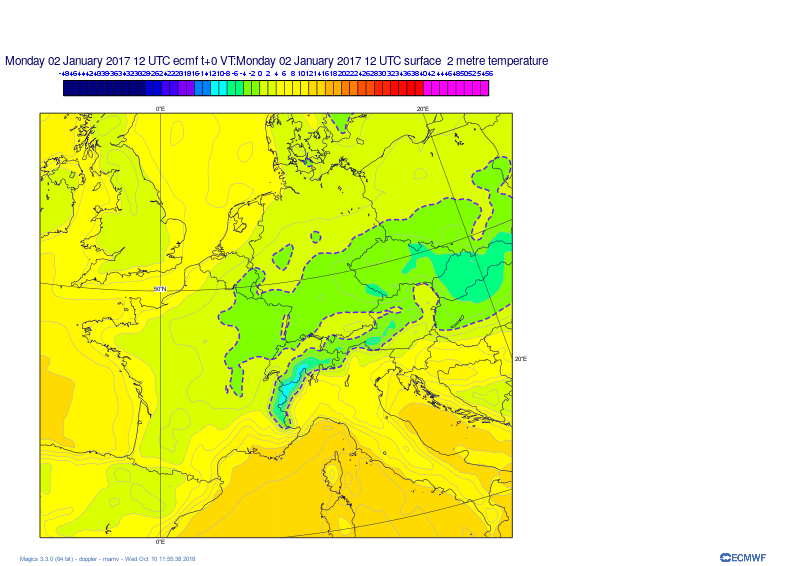

In [117]:
contour = magics.mcont(contour_automatic_setting = 'style_name',
                      contour_style_name = One_style.value,
                      legend = 'on')

magics.plot(projection, data, contour, coast, legend, title)

### Magics offers number of predefined palettes, for a bit more flexibility

It would be ideal if our number of levels matched number of colours in palette.  
If for any reason that is not the case, we can set parameter **contour_shade_palette_policy** to **'lastone'** or **'cycle'**, so Magics knows what to do if there are more levels than colours.   
Full list of Magics palletes can be found [here](https://confluence.ecmwf.int/display/MAGP/Predefined+palettes+in+Magics "Magics palettes")

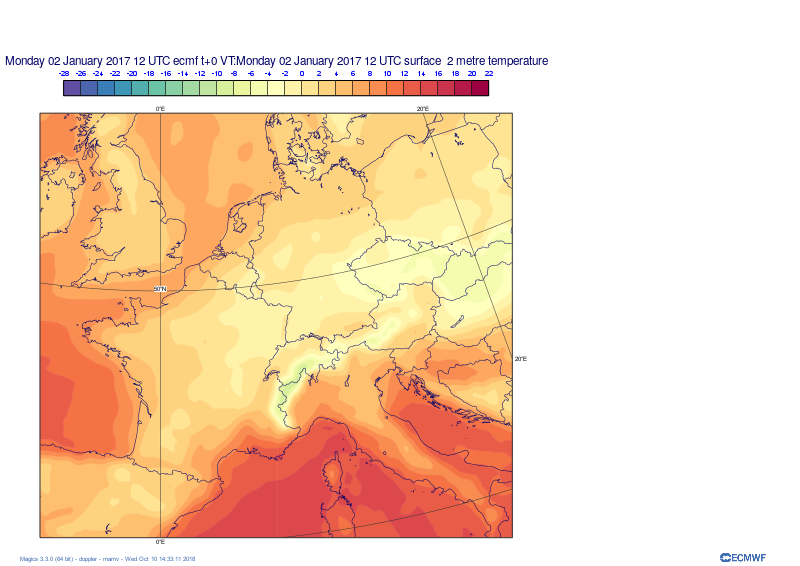

In [121]:
contour = magics.mcont(
    legend = 'on',
    contour = 'off',
    contour_shade = 'on',
    contour_label = 'off',
    contour_level_selection_type = 'interval',
    contour_interval = 2.0,
    contour_shade_min_level = -28.0,
    contour_shade_max_level = 22.0,
    contour_shade_method = 'area_fill',
    contour_shade_palette_name = 'eccharts_rainbow_purple_red_25',
    contour_shade_colour_method = 'palette'
)

magics.plot(projection, data, contour, legend, coast, title)

### If we want, we can have a full control, of course

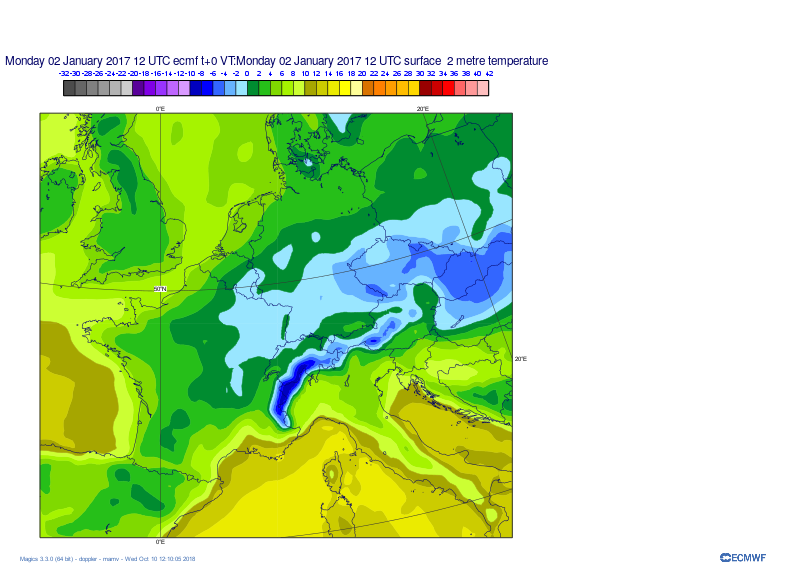

In [120]:
contour = magics.mcont(legend = "on",
                       contour = "off",
                       contour_label = "off",
                       contour_hilo = "off",
                       contour_level_selection_type = "interval",
                       contour_interval = 2.00,
                       contour_shade_min_level = -32.00,
                       contour_shade_max_level = 42.00,      
                       contour_shade = "on",
                       contour_shade_method = "area_fill",
                       contour_shade_colour_method = "list",
                       contour_shade_colour_list = ['rgb(0.3,0.3,0.3)', 'rgb(0.4,0.4,0.4)', 'rgb(0.5,0.5,0.5)', 
                                   'rgb(0.6,0.6,0.6)', 'rgb(0.7,0.7,0.7)', 'rgb(0.8,0.8,0.8)', 
                                   'rgb(0.35,0,0.6)', 'rgb(0.5,0,0.9)', 'rgb(0.6,0.2,1)', 
                                   'rgb(0.75,0.4,1)', 'rgb(0.85,0.6,1)', 'rgb(0,0,0.75)', 
                                   'rgb(0,0,1)', 'rgb(0.2,0.4,1)', 'rgb(0.4,0.7,1)', 'rgb(0.6,0.9,1)', 
                                   'rgb(0,0.55,0.19)', 'rgb(0.15,0.75,0.1)', 'rgb(0.5,0.85,0)', 
                                   'rgb(0.65,0.95,0)', 'rgb(0.8,1,0.2)', 'rgb(0.65,0.65,0)', 
                                   'rgb(0.8,0.8,0)', 'rgb(0.92,0.92,0)', 'rgb(1,1,0)', 
                                   'rgb(1,1,0.6)', 'rgb(0.85,0.45,0)', 'rgb(1,0.5,0)', 
                                   'rgb(1,0.62,0)', 'rgb(1,0.74,0)', 'rgb(1,0.85,0)', 
                                   'rgb(0.6,0,0)', 'rgb(0.8,0,0)', 'rgb(1,0,0)', 
                                   'rgb(1,0.4,0.4)', 'rgb(1,0.6,0.6)', 'rgb(1,0.75,0.75)'])

magics.plot(projection, data, contour, legend, coast, title)